<a href="https://colab.research.google.com/github/PDGamerSG/GDSC-Image_Classification/blob/main/Vault17Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pdgamersg","key":"35378d4ad319c63c6a143638f767f63c"}'}

In [ ]:
mkdir ~/.kaggle

In [ ]:
cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                             title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
abdulmalik1518/mobiles-dataset-2025                             Mobiles Dataset (2025)                           20KB  2025-02-18 06:50:24           6998        120  1.0              
asinow/car-price-dataset                                        Car Price Dataset                               135KB  2025-01-26 19:53:28          23944        377  1.0              
mahmoudelhemaly/students-grading-dataset                        Student Performance & Behavior Dataset          508KB  2025-02-17 17:38:46           5525        102  1.0              
samikshadalvi/lungs-diseases-dataset                            Lungs Diseases D

In [ ]:
!kaggle datasets download -d shreelakshmigp/cedardataset

Dataset URL: https://www.kaggle.com/datasets/shreelakshmigp/cedardataset
License(s): unknown
 96% 233M/242M [00:03<00:00, 85.3MB/s]
100% 242M/242M [00:03<00:00, 77.6MB/s]


In [ ]:
! unzip cedardataset.zip

Archive:  cedardataset.zip
  inflating: signatures/Readme.txt   
  inflating: signatures/full_forg/Thumbs.db  
  inflating: signatures/full_forg/forgeries_10_1.png  
  inflating: signatures/full_forg/forgeries_10_10.png  
  inflating: signatures/full_forg/forgeries_10_11.png  
  inflating: signatures/full_forg/forgeries_10_12.png  
  inflating: signatures/full_forg/forgeries_10_13.png  
  inflating: signatures/full_forg/forgeries_10_14.png  
  inflating: signatures/full_forg/forgeries_10_15.png  
  inflating: signatures/full_forg/forgeries_10_16.png  
  inflating: signatures/full_forg/forgeries_10_17.png  
  inflating: signatures/full_forg/forgeries_10_18.png  
  inflating: signatures/full_forg/forgeries_10_19.png  
  inflating: signatures/full_forg/forgeries_10_2.png  
  inflating: signatures/full_forg/forgeries_10_20.png  
  inflating: signatures/full_forg/forgeries_10_21.png  
  inflating: signatures/full_forg/forgeries_10_22.png  
  inflating: signatures/full_forg/forgeries_10_23.p

In [ ]:
!nvidia-smi

Thu Mar  6 14:16:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!ls signatures

full_forg  full_org  Readme.txt


In [ ]:
!ls cedardataset/full_forg

ls: cannot access 'cedardataset/full_forg': No such file or directory


In [ ]:
!ls signatures/full_forg

forgeries_10_10.png  forgeries_22_17.png  forgeries_34_6.png   forgeries_47_21.png
forgeries_10_11.png  forgeries_22_18.png  forgeries_34_7.png   forgeries_47_22.png
forgeries_10_12.png  forgeries_22_19.png  forgeries_34_8.png   forgeries_47_23.png
forgeries_10_13.png  forgeries_2_21.png   forgeries_34_9.png   forgeries_47_24.png
forgeries_10_14.png  forgeries_22_1.png   forgeries_3_4.png    forgeries_47_2.png
forgeries_10_15.png  forgeries_22_20.png  forgeries_35_10.png  forgeries_47_3.png
forgeries_10_16.png  forgeries_22_21.png  forgeries_35_11.png  forgeries_47_4.png
forgeries_10_17.png  forgeries_22_22.png  forgeries_35_12.png  forgeries_47_5.png
forgeries_10_18.png  forgeries_22_23.png  forgeries_35_13.png  forgeries_47_6.png
forgeries_10_19.png  forgeries_22_24.png  forgeries_35_14.png  forgeries_47_7.png
forgeries_10_1.png   forgeries_2_22.png   forgeries_35_15.png  forgeries_47_8.png
forgeries_10_20.png  forgeries_22_2.png   forgeries_35_16.png  forgeries_47_9.png
forgeries_10

In [ ]:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.18.0


In [ ]:
import os
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
dataset_path = '/content/signatures'
original_path = os.path.join(dataset_path, 'full_org')
forged_path = os.path.join(dataset_path, 'full_forg')
# Some Functions Mean,std , max,min
def extract_basic_features(img_array):
    return [
        img_array.mean(),
        img_array.std(),
        img_array.max(),
        img_array.min()
    ]

def aspect_ratio(image_path):
    img = Image.open(image_path)
    width, height = img.size
    aspect_ratio = width / height
    return aspect_ratio
features = []
images = []
labels = []
# Load original signatures
for img_file in os.listdir(original_path):
    if img_file.startswith('original_'):
        img_path = os.path.join(original_path, img_file)
        img = Image.open(img_path).convert('L')
        img_array = np.array(img)
        features.append(extract_basic_features(img_array))
        images.append(img_array)
        labels.append(0)
# Load forged signatures
for img_file in os.listdir(forged_path):
    if img_file.startswith('forgeries_'):
        img_path = os.path.join(forged_path, img_file)
        img = Image.open(img_path).convert('L')
        img_array = np.array(img)
        features.append(extract_basic_features(img_array))
        images.append(img_array)
        labels.append(1)
X = np.array(features)
images = np.array(images, dtype=object)
y = np.array(labels)

In [ ]:
# Calculate aspect ratios for original images
original_aspect_ratios = []
for img_file in os.listdir(original_path):
    if img_file.endswith(('.png')):
        img_path = os.path.join(original_path, img_file)
        #this just help to provide the path to the image in the folder
        original_aspect_ratios.append(aspect_ratio(img_path))

# Calculate aspect ratios for forged images
forged_aspect_ratios = []
for img_file in os.listdir(forged_path):
    if img_file.endswith(('.png')):
        img_path = os.path.join(forged_path, img_file)
        forged_aspect_ratios.append(aspect_ratio(img_path))

print("Aspect Ratios of Original Images:", original_aspect_ratios)
print("Aspect Ratios of Forged Images:", forged_aspect_ratios)

Aspect Ratios of Original Images: [1.437246963562753, 1.4246575342465753, 1.3472222222222223, 1.7735849056603774, 1.3617977528089888, 2.218867924528302, 1.1748971193415638, 1.5265017667844523, 1.9423076923076923, 1.0795454545454546, 1.36986301369863, 1.1853281853281854, 1.8977635782747604, 1.3611111111111112, 0.9852631578947368, 1.9335548172757475, 1.2185686653771761, 2.466403162055336, 1.0228070175438597, 1.4153846153846155, 1.6551724137931034, 1.3333333333333333, 1.0, 1.0898876404494382, 1.7017543859649122, 1.4133333333333333, 1.6833333333333333, 1.2469135802469136, 1.0786516853932584, 1.4558823529411764, 1.1170212765957446, 1.3355481727574752, 1.0, 1.8308157099697886, 1.4961038961038962, 1.3353115727002967, 1.3966745843230404, 1.2916666666666667, 1.1136363636363635, 1.5924932975871313, 1.3752808988764045, 1.197651663405088, 1.1931166347992352, 3.242424242424242, 2.5991902834008096, 1.33201581027668, 2.3690036900369003, 1.5272727272727273, 1.9411764705882353, 1.3568904593639577, 1.32

Label for this image is: Original


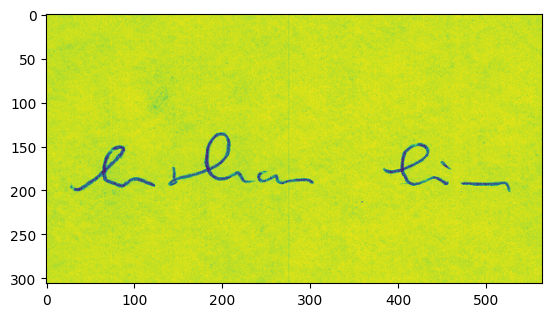

In [ ]:
#sanity check
import random
import matplotlib.pyplot as plt
image_number = random.randint(0, len(images) - 1)
plt.imshow(images[image_number])
if(y[image_number] == 1):
    print("Label for this image is: Forged")
else:
    print("Label for this image is: Original")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
X_train_scaled = X_train /255
X_test_scaled = X_test/255

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test_scaled)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[260   0]
 [  0 268]]


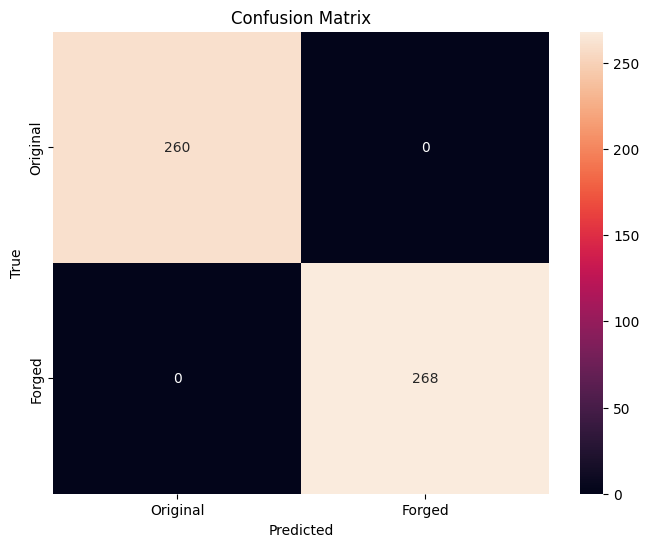

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['Original', 'Forged'],
            yticklabels=['Original', 'Forged'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Bonus Task(Trying Hard)

In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
!nvidia-smi

Thu Mar  6 14:17:27 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
from google.colab import files
import random

# Create directories in Colab
original_dir = '/content/signatures/full_org'
style_dir = '/content/style_patterns'
output_dir = '/content/synthetic_forgeries'

os.makedirs(original_dir, exist_ok=True)
os.makedirs(style_dir, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)

# Upload original signatures
print("Upload original signatures:")
uploaded = files.upload()
for filename in uploaded.keys():
    os.rename(filename, os.path.join(original_dir, filename))

# Upload style patterns
print("Upload handwriting style patterns:")
uploaded = files.upload()
for filename in uploaded.keys():
    os.rename(filename, os.path.join(style_dir, filename))

# Load and prepare images
def load_image(path, size=256):
    img = Image.open(path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize(size),
        transforms.ToTensor(),
    ])
    return transform(img).unsqueeze(0)

# Simple Neural Style Transfer function
def create_synthetic_forgery(content_path, style_path, output_path, steps=100):
    # Load VGG model
    vgg = models.vgg19(pretrained=True).features.eval()

    # Load content and style images
    content_img = load_image(content_path)
    style_img = load_image(style_path)

    # Start with content image
    generated = content_img.clone().requires_grad_(True)

    # Simple optimizer
    optimizer = torch.optim.Adam([generated], lr=0.01)

    # Style transfer loop
    for step in range(steps):
        # Extract features
        content_features = vgg(content_img)
        style_features = vgg(style_img)
        generated_features = vgg(generated)

        # Calculate content and style loss
        content_loss = torch.mean((generated_features - content_features) ** 2)
        style_loss = torch.mean((generated_features - style_features) ** 2)

        # Total loss (style is weighted more)
        total_loss = content_loss + 1000 * style_loss

        # Update image
        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()

        if step % 20 == 0:
            print(f"Step {step}/{steps}")

    # Save result
    result = generated.squeeze().detach().numpy().transpose(1, 2, 0)
    result = np.clip(result, 0, 1)
    plt.imsave(output_path, result)
    return output_path

# Generate synthetic forgeries
def generate_forgeries(num_samples=3):
    originals = [f for f in os.listdir(original_dir)]
    styles = [f for f in os.listdir(style_dir)]

    for i in range(num_samples):
        orig = random.choice(originals)
        style = random.choice(styles)

        orig_path = os.path.join(original_dir, orig)
        style_path = os.path.join(style_dir, style)
        output_path = os.path.join(output_dir, f'synthetic_{i}.png')

        create_synthetic_forgery(orig_path, style_path, output_path)
        print(f"Created forgery {i+1}/{num_samples}")

        # Display result
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(plt.imread(orig_path))
        plt.title("Original Signature")
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(plt.imread(style_path))
        plt.title("Style Pattern")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(plt.imread(output_path))
        plt.title("Synthetic Forgery")
        plt.axis('off')
        plt.show()

# Generate forgeries
generate_forgeries(num_samples=3)

# Test your model on synthetic forgeries
def test_model(model, scaler):
    features = []

    # Extract features from synthetic forgeries
    for img_file in os.listdir(output_dir):
        img = Image.open(os.path.join(output_dir, img_file)).convert('L')
        img_array = np.array(img)

        # Extract same features as your original model
        img_features = [
            img_array.mean(),
            img_array.std(),
            img_array.max(),
            img_array.min()
        ]

        features.append(img_features)

    # Scale features and predict
    X = scaler.transform(features)
    predictions = model.predict(X)

    # All synthetic images should be classified as forged (1)
    expected = np.ones(len(predictions))

    # Calculate accuracy
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(expected, predictions)
    print(f"Model accuracy on synthetic forgeries: {acc:.2f}")

    return predictions

# Note: Run this after you've loaded your trained model and scaler
# test_model(rf_classifier, scaler)


Upload original signatures:
